In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [177]:
x= np.array([1,2,3,4])
y= np.array([2,2.8,3.6,4.5])

In [178]:
y

array([2. , 2.8, 3.6, 4.5])

In [179]:
w = 0
b = 0
alpha = 0.01
num_iteration = 20


In [180]:
sse_values = []

#Gradient descent

for i in range(num_iteration):
    
    y_hat = w*x + b
    
    D_w = 2 * np.sum((y_hat -y)*x)####gradient of w 
    D_b = 2 * np.sum(y_hat-y)### gradient of  b 
    
    #Update parameters
    w -= alpha * D_w
    b -= alpha * D_b
    
    #compute sse and store it on sse variable
    sse = (np.sum((y_hat -y)**2))
    sse_values.append(sse)
    
    if (i+1)  % 20 == 0 :
        print(f"iteration {i+1}, SSE: {sse}")
    
    

iteration 20, SSE: 0.2586443145721848


In [181]:

print(f"Optimized parameters: bais = {b}, slop = {w}")

Optimized parameters: bais = 0.5388025938800368, slop = 1.0378816512559883


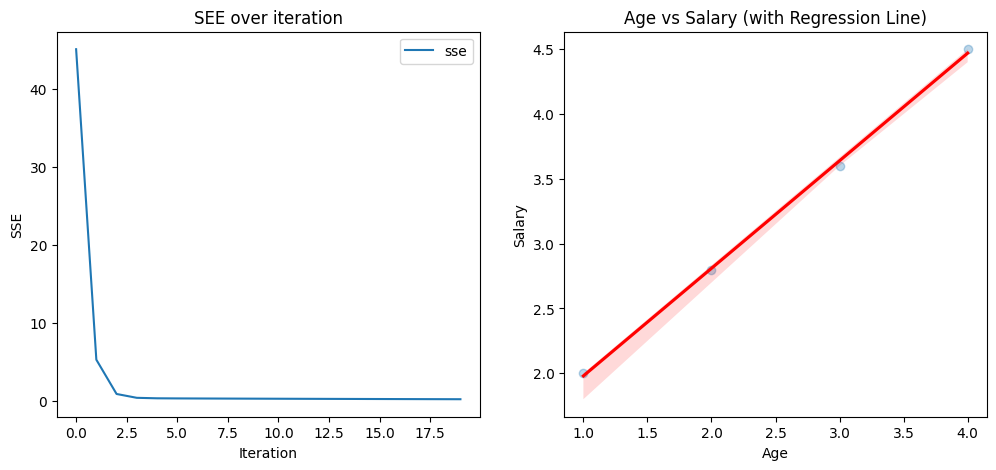

In [186]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(num_iteration),sse_values,label='sse')
plt.xlabel("Iteration")
plt.ylabel('SSE')
plt.title('SEE over iteration')
plt.legend()
# plt.show()

plt.subplot(1,2,2) 
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}) 
plt.xlabel("Age") 
plt.ylabel("Salary") 
plt.title("Age vs Salary (with Regression Line)") 
plt.show()


In [9]:
y=w * x + b
y

array([1.57668425, 2.6145659 , 3.65244755, 4.6903292 ])

np.float64(12.993382408951897)

In [157]:


class LReg:

    def __init__(self, alpha, num_iterations):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.w = 0
        self.b = 0
        self.sse_values = []
        self.y_hat = None

    def predict(self, x):
        y_hat = self.w * x + self.b
        self.y_hat = y_hat
        return y_hat

    # def gradiant_decent(self, x , y , y_hat):
    #     delta_w = np.mean(y_hat - y)* x
    #     delta_b = np.mean(y_hat - y)

    def gradient_descent(self, x, y, y_hat):
        delta_w = np.mean((y_hat - y) * x)
        delta_b = np.mean(y_hat - y)
        return delta_w, delta_b


        return delta_w , delta_b
    
    def calculate_sse(self, y , y_hat):
        sse = (np.sum((y_hat -y)**2))
        return sse
    
    def fit(self, x , y):

        for i in range(self.num_iterations):
            y_hat = self.predict(x)
            dw,db = self.gradient_descent(x , y , y_hat)

            self.w -= self.alpha * dw
            self.b -= self.alpha * db

            sse = self.calculate_sse(y , y_hat)
            self.sse_values.append(sse)

            if (i+1) % 20 == 0:
                print(f"iteration {i+1}: sse is equal to {sse}")

        return self
 
    def plot(self , x , y):
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(range(self.num_iterations),self.sse_values,label='sse')
        plt.xlabel("Iteration")
        plt.ylabel('SSE')
        plt.title('SEE over iteration')
        plt.legend()
        # plt.show()

        plt.subplot(1,2,2) 
        sns.regplot(x=x, y=y, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}) 
        plt.xlabel("Age") 
        plt.ylabel("Salary") 
        plt.title("Age vs Salary (with Regression Line)") 
        plt.show()



In [158]:
df = pd.read_csv('Employee.csv')

df.head()


x = df['Age']
y = df['Salary']

y.head()
# x = np.array([1,2,3,4])
# y = np.array([2,2.2,3.6,4.5])


0    102059
1    157718
2    309964
3    293132
4     49606
Name: Salary, dtype: int64

iteration 20: sse is equal to 12053368054997.506


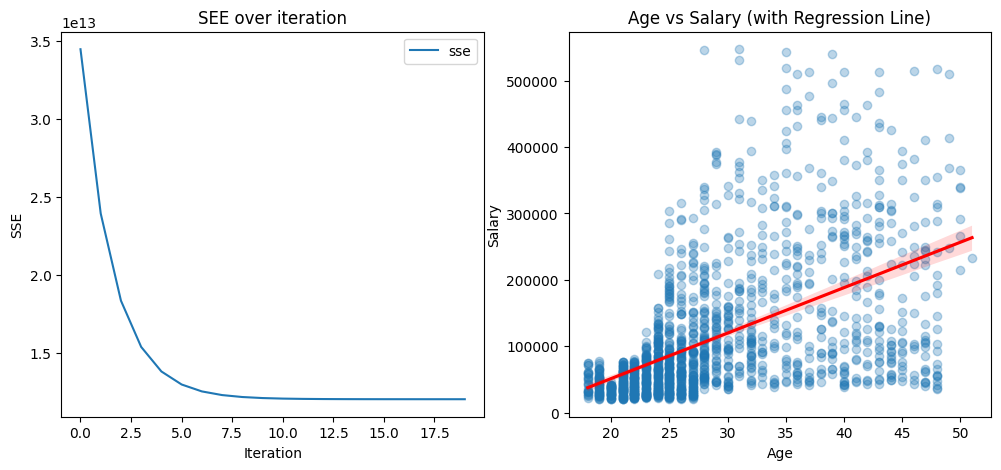

In [176]:
l = LReg(alpha = 0.0003, num_iterations = 20)
l.fit(x,y)
l.plot(x,y)

In [150]:
print("Final slope (w):", l.w) 
print("Final intercept (b):", l.b)


Final slope (w): 4128.860673915634
Final intercept (b): -768.7388434512098


In [151]:
corr = np.corrcoef(df["Age"], df["Salary"])[0,1] 
print("Correlation between Age and Salary:", corr)

Correlation between Age and Salary: 0.5292271428412809
